In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.vgg16  import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image as keras_image
from scipy.spatial import distance
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tqdm import tqdm

# Check the number of available GPUs
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


In [11]:
# Define the directories
in_dist_dir = 'in_dist_pool'
out_dist_cxr_dir = 'out-dist-cxr'

# Function to get image sizes and shapes
def get_image_sizes_shapes(directory):
    image_sizes = []
    image_shapes = []
    for image_path in Path(directory).glob('*.png'):  # Assuming the images are .png, change if needed
        with Image.open(image_path) as img:
            image_sizes.append(img.size)  # (width, height)
            image_shapes.append(np.array(img).shape)  # (height, width) for grayscale or (height, width, channels) for RGB
    return image_sizes, image_shapes

# Get image sizes and shapes for in_dist_pool and out-dist-cxr
in_dist_sizes, in_dist_shapes = get_image_sizes_shapes(in_dist_dir)
out_dist_cxr_sizes, out_dist_cxr_shapes = get_image_sizes_shapes(out_dist_cxr_dir)

# Check consistency in sizes and shapes
print(f"All images in in_dist_pool are consistent in size: {all(size == in_dist_sizes[0] for size in in_dist_sizes)}")
print(f"All images in in_dist_pool are consistent in shape: {all(shape == in_dist_shapes[0] for shape in in_dist_shapes)}")
print(f"All images in out-dist-cxr are consistent in size: {all(size == out_dist_cxr_sizes[0] for size in out_dist_cxr_sizes)}")
print(f"All images in out-dist-cxr are consistent in shape: {all(shape == out_dist_cxr_shapes[0] for shape in out_dist_cxr_shapes)}")


All images in in_dist_pool are consistent in size: True
All images in in_dist_pool are consistent in shape: True
All images in out-dist-cxr are consistent in size: True
All images in out-dist-cxr are consistent in shape: True


In [12]:
# Load VGG16 model
# A trained VGG16 model or any other model can be loaded, given that you have the trained model saved somewhere. 
# See Train CXR Classifier notebook for training VGG16 for a specific task. 

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)


# Function to extract features from a batch of images
def extract_batch_features(batch_images):
    preprocessed_imgs = preprocess_input(batch_images * 255)
    features = model.predict(preprocessed_imgs)
    flattened_features = features.reshape(features.shape[0], -1)
    return flattened_features

# Function to extract features from individual images
def extract_features_from_images(image_paths):
    all_features = []
    for img_path in tqdm(image_paths):
        # Load and preprocess the image
        img = keras_image.load_img(img_path, target_size=(224, 224), color_mode='rgb')
        img_array = keras_image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array * 255)

        # Extract features
        features = model.predict(img_array)
        flattened_features = features.reshape(-1)
        all_features.append(flattened_features)

    return np.array(all_features)



58889256/58889256 [==============================] - 2s 0us/step


In [13]:
# Get a list of image paths
in_dist_image_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(in_dist_dir) for f in filenames if f.endswith('.png')]
out_dist_image_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(out_dist_cxr_dir) for f in filenames if f.endswith('.png')]

# Extract features
in_dist_features = extract_features_from_images(in_dist_image_paths)
out_dist_features = extract_features_from_images(out_dist_image_paths)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 7s 7s/step


  0%|          | 1/1000 [00:06<1:52:25,  6.75s/it]

1/1 [==============================] - 0s 18ms/step


  0%|          | 3/1000 [00:06<29:47,  1.79s/it]  

1/1 [==============================] - 0s 17ms/step


  0%|          | 5/1000 [00:06<14:57,  1.11it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 7/1000 [00:07<09:04,  1.82it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 9/1000 [00:07<05:57,  2.77it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 11/1000 [00:07<04:11,  3.93it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 13/1000 [00:07<04:10,  3.95it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 15/1000 [00:07<03:08,  5.23it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 17/1000 [00:08<02:26,  6.70it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 19/1000 [00:08<01:58,  8.29it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 21/1000 [00:08<01:37, 10.03it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 23/1000 [00:08<01:24, 11.52it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▎         | 25/1000 [00:08<01:14, 13.03it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 27/1000 [00:08<01:07, 14.42it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 29/1000 [00:08<01:02, 15.56it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 31/1000 [00:08<00:58, 16.43it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 33/1000 [00:08<00:57, 16.89it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▎         | 35/1000 [00:09<00:54, 17.61it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▎         | 37/1000 [00:09<00:53, 18.00it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 39/1000 [00:09<00:52, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 41/1000 [00:09<00:52, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 43/1000 [00:09<00:52, 18.27it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 45/1000 [00:09<00:51, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 47/1000 [00:09<00:51, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 49/1000 [00:09<00:51, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 51/1000 [00:09<00:51, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 53/1000 [00:10<00:51, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 55/1000 [00:10<00:50, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 57/1000 [00:10<00:49, 19.10it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 59/1000 [00:10<00:50, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 61/1000 [00:10<00:50, 18.78it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▋         | 63/1000 [00:10<00:49, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 65/1000 [00:10<00:50, 18.63it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 67/1000 [00:10<00:49, 18.77it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 69/1000 [00:10<00:49, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 71/1000 [00:10<00:49, 18.95it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 73/1000 [00:11<00:48, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 75/1000 [00:11<00:49, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 77/1000 [00:11<00:49, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 79/1000 [00:11<00:50, 18.38it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 81/1000 [00:11<00:50, 18.31it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 83/1000 [00:11<00:49, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 85/1000 [00:11<00:48, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 87/1000 [00:11<00:49, 18.41it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 89/1000 [00:11<00:49, 18.39it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 91/1000 [00:12<00:50, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 93/1000 [00:12<00:50, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 95/1000 [00:12<00:49, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 97/1000 [00:12<00:48, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 99/1000 [00:12<00:47, 18.77it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 101/1000 [00:12<00:47, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 103/1000 [00:12<00:47, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 105/1000 [00:12<00:48, 18.40it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 107/1000 [00:12<00:50, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 109/1000 [00:13<00:49, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 111/1000 [00:13<00:48, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 113/1000 [00:13<00:49, 17.93it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 115/1000 [00:13<00:49, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 117/1000 [00:13<00:48, 18.07it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 119/1000 [00:13<00:47, 18.38it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 121/1000 [00:13<00:47, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 123/1000 [00:13<00:47, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▎        | 125/1000 [00:13<00:46, 18.79it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 127/1000 [00:14<00:46, 18.95it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 129/1000 [00:14<00:45, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 131/1000 [00:14<00:45, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 133/1000 [00:14<00:45, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 135/1000 [00:14<00:46, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 137/1000 [00:14<00:48, 17.96it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 139/1000 [00:14<00:47, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 141/1000 [00:14<00:48, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 143/1000 [00:14<00:47, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 145/1000 [00:14<00:47, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 147/1000 [00:15<00:46, 18.45it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▍        | 149/1000 [00:15<00:46, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 151/1000 [00:15<00:46, 18.32it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 153/1000 [00:15<00:45, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 155/1000 [00:15<00:45, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 157/1000 [00:15<00:44, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 159/1000 [00:15<00:45, 18.54it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 161/1000 [00:15<00:44, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 164/1000 [00:15<00:43, 19.25it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 166/1000 [00:16<00:43, 19.30it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 168/1000 [00:16<00:43, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 170/1000 [00:16<00:43, 19.25it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 172/1000 [00:16<00:43, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 174/1000 [00:16<00:44, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 176/1000 [00:16<00:43, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 178/1000 [00:16<00:43, 18.71it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 180/1000 [00:16<00:43, 18.96it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 182/1000 [00:16<00:42, 19.21it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 184/1000 [00:17<00:42, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 186/1000 [00:17<00:43, 18.84it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 188/1000 [00:17<00:42, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 190/1000 [00:17<00:42, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 192/1000 [00:17<00:42, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 194/1000 [00:17<00:42, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 196/1000 [00:17<00:43, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 198/1000 [00:17<00:42, 18.88it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 201/1000 [00:17<00:41, 19.42it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 203/1000 [00:18<00:40, 19.50it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 205/1000 [00:18<00:41, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 207/1000 [00:18<00:42, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 209/1000 [00:18<00:42, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 211/1000 [00:18<00:41, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 213/1000 [00:18<00:41, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 215/1000 [00:18<00:41, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 217/1000 [00:18<00:41, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 219/1000 [00:18<00:40, 19.19it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 221/1000 [00:18<00:40, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 223/1000 [00:19<00:41, 18.81it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▎       | 225/1000 [00:19<00:40, 18.94it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 227/1000 [00:19<00:40, 19.15it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 229/1000 [00:19<00:40, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 231/1000 [00:19<00:41, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 233/1000 [00:19<00:41, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 235/1000 [00:19<00:41, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 237/1000 [00:19<00:41, 18.60it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 239/1000 [00:19<00:40, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 241/1000 [00:20<00:41, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 243/1000 [00:20<00:41, 18.41it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 245/1000 [00:20<00:40, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 247/1000 [00:20<00:40, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 249/1000 [00:20<00:40, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 251/1000 [00:20<00:40, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 253/1000 [00:20<00:40, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 255/1000 [00:20<00:39, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 257/1000 [00:20<00:39, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 259/1000 [00:21<00:40, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 261/1000 [00:21<00:40, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 263/1000 [00:21<00:39, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 265/1000 [00:21<00:39, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 267/1000 [00:21<00:40, 17.97it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 269/1000 [00:21<00:40, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 271/1000 [00:21<00:40, 18.22it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 273/1000 [00:21<00:40, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 275/1000 [00:21<00:40, 17.69it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 277/1000 [00:22<00:40, 17.67it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 279/1000 [00:22<00:40, 17.93it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 281/1000 [00:22<00:38, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 283/1000 [00:22<00:38, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 285/1000 [00:22<00:38, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 287/1000 [00:22<00:38, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 289/1000 [00:22<00:38, 18.39it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 291/1000 [00:22<00:37, 18.70it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 293/1000 [00:22<00:37, 19.01it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 295/1000 [00:22<00:37, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 297/1000 [00:23<00:37, 18.98it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 299/1000 [00:23<00:36, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 301/1000 [00:23<00:37, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 303/1000 [00:23<00:37, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 305/1000 [00:23<00:37, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 307/1000 [00:23<00:37, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 309/1000 [00:23<00:36, 18.70it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 311/1000 [00:23<00:36, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 313/1000 [00:23<00:36, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 315/1000 [00:24<00:36, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 317/1000 [00:24<00:36, 18.96it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 319/1000 [00:24<00:35, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 321/1000 [00:24<00:36, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 323/1000 [00:24<00:35, 19.06it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▎      | 325/1000 [00:24<00:35, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 327/1000 [00:24<00:35, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 329/1000 [00:24<00:35, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 331/1000 [00:24<00:36, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 333/1000 [00:25<00:37, 17.63it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▎      | 335/1000 [00:25<00:37, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 337/1000 [00:25<00:38, 17.19it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 339/1000 [00:25<00:37, 17.42it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 341/1000 [00:25<00:38, 17.03it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 343/1000 [00:25<00:37, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 345/1000 [00:25<00:37, 17.59it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 347/1000 [00:25<00:36, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 349/1000 [00:25<00:36, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 351/1000 [00:26<00:36, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 353/1000 [00:26<00:36, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 355/1000 [00:26<00:36, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 357/1000 [00:26<00:36, 17.55it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 359/1000 [00:26<00:36, 17.63it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 361/1000 [00:26<00:36, 17.46it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 363/1000 [00:26<00:36, 17.68it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 365/1000 [00:26<00:35, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 367/1000 [00:26<00:35, 17.80it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 369/1000 [00:27<00:34, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 371/1000 [00:27<00:34, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 373/1000 [00:27<00:34, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 375/1000 [00:27<00:34, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 377/1000 [00:27<00:35, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 379/1000 [00:27<00:34, 17.92it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 381/1000 [00:27<00:33, 18.26it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 383/1000 [00:27<00:33, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 385/1000 [00:27<00:34, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 387/1000 [00:28<00:33, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 389/1000 [00:28<00:33, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 391/1000 [00:28<00:33, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 393/1000 [00:28<00:33, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 395/1000 [00:28<00:34, 17.73it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 397/1000 [00:28<00:33, 18.17it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 399/1000 [00:28<00:32, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 40%|████      | 401/1000 [00:28<00:31, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 403/1000 [00:28<00:32, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 40%|████      | 405/1000 [00:29<00:32, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 407/1000 [00:29<00:31, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████      | 409/1000 [00:29<00:31, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 411/1000 [00:29<00:31, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 413/1000 [00:29<00:32, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 415/1000 [00:29<00:31, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 417/1000 [00:29<00:31, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 419/1000 [00:29<00:31, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 421/1000 [00:29<00:30, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 423/1000 [00:30<00:31, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▎     | 425/1000 [00:30<00:30, 18.57it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 427/1000 [00:30<00:30, 18.79it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 429/1000 [00:30<00:30, 19.01it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 431/1000 [00:30<00:30, 18.68it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 433/1000 [00:30<00:31, 18.07it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▎     | 435/1000 [00:30<00:30, 18.44it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▎     | 437/1000 [00:30<00:29, 18.83it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▍     | 439/1000 [00:30<00:29, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 441/1000 [00:30<00:29, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 443/1000 [00:31<00:29, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 445/1000 [00:31<00:29, 18.63it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 447/1000 [00:31<00:29, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 449/1000 [00:31<00:30, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 451/1000 [00:31<00:29, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 453/1000 [00:31<00:29, 18.69it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 455/1000 [00:31<00:28, 18.91it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 457/1000 [00:31<00:28, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 459/1000 [00:31<00:28, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 462/1000 [00:32<00:27, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▋     | 464/1000 [00:32<00:27, 19.18it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 466/1000 [00:32<00:27, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 468/1000 [00:32<00:28, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 470/1000 [00:32<00:27, 19.00it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 472/1000 [00:32<00:27, 19.22it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 474/1000 [00:32<00:27, 19.18it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 476/1000 [00:32<00:28, 18.48it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 478/1000 [00:32<00:28, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 480/1000 [00:33<00:27, 18.88it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 482/1000 [00:33<00:27, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 484/1000 [00:33<00:27, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▊     | 486/1000 [00:33<00:27, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 488/1000 [00:33<00:27, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 490/1000 [00:33<00:27, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 492/1000 [00:33<00:27, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 494/1000 [00:33<00:27, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 496/1000 [00:33<00:27, 18.33it/s]

1/1 [==============================] - 0s 16ms/step


 50%|████▉     | 498/1000 [00:34<00:26, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 500/1000 [00:34<00:26, 18.74it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 502/1000 [00:34<00:26, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 504/1000 [00:34<00:26, 18.88it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 506/1000 [00:34<00:25, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 508/1000 [00:34<00:25, 19.13it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 510/1000 [00:34<00:25, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 512/1000 [00:34<00:25, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████▏    | 514/1000 [00:34<00:25, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 516/1000 [00:34<00:25, 19.24it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 518/1000 [00:35<00:24, 19.42it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 520/1000 [00:35<00:24, 19.31it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 522/1000 [00:35<00:25, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 524/1000 [00:35<00:25, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 526/1000 [00:35<00:24, 19.07it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 528/1000 [00:35<00:24, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 530/1000 [00:35<00:25, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 532/1000 [00:35<00:24, 19.02it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 534/1000 [00:35<00:24, 19.18it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▎    | 536/1000 [00:36<00:24, 19.18it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 538/1000 [00:36<00:24, 19.22it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 540/1000 [00:36<00:24, 18.90it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 542/1000 [00:36<00:23, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 545/1000 [00:36<00:23, 19.47it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▍    | 547/1000 [00:36<00:23, 19.44it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 549/1000 [00:36<00:23, 19.06it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 552/1000 [00:36<00:23, 19.47it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 554/1000 [00:36<00:23, 19.27it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▌    | 556/1000 [00:37<00:22, 19.37it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 558/1000 [00:37<00:23, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 560/1000 [00:37<00:22, 19.22it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 562/1000 [00:37<00:22, 19.42it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▋    | 564/1000 [00:37<00:22, 18.99it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 566/1000 [00:37<00:23, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 568/1000 [00:37<00:22, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 570/1000 [00:37<00:22, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 572/1000 [00:37<00:22, 19.00it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 574/1000 [00:37<00:22, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 576/1000 [00:38<00:22, 18.69it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 578/1000 [00:38<00:22, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 580/1000 [00:38<00:22, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 582/1000 [00:38<00:23, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 584/1000 [00:38<00:23, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▊    | 586/1000 [00:38<00:23, 17.84it/s]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 588/1000 [00:38<00:22, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 590/1000 [00:38<00:22, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 592/1000 [00:38<00:21, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 594/1000 [00:39<00:22, 18.25it/s]

1/1 [==============================] - 0s 16ms/step


 60%|█████▉    | 596/1000 [00:39<00:21, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 598/1000 [00:39<00:21, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 60%|██████    | 600/1000 [00:39<00:21, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 602/1000 [00:39<00:21, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 60%|██████    | 604/1000 [00:39<00:21, 18.29it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████    | 606/1000 [00:39<00:21, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████    | 608/1000 [00:39<00:21, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 610/1000 [00:39<00:21, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 612/1000 [00:40<00:21, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████▏   | 614/1000 [00:40<00:21, 18.09it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 616/1000 [00:40<00:20, 18.43it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 618/1000 [00:40<00:20, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 620/1000 [00:40<00:20, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 622/1000 [00:40<00:20, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 624/1000 [00:40<00:20, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 626/1000 [00:40<00:20, 18.40it/s]

1/1 [==============================] - 0s 16ms/step


 63%|██████▎   | 628/1000 [00:40<00:20, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 630/1000 [00:41<00:20, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 632/1000 [00:41<00:20, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 634/1000 [00:41<00:20, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 636/1000 [00:41<00:19, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 638/1000 [00:41<00:20, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 640/1000 [00:41<00:20, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 642/1000 [00:41<00:19, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 644/1000 [00:41<00:19, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 646/1000 [00:41<00:19, 18.33it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▍   | 648/1000 [00:42<00:19, 18.14it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▌   | 650/1000 [00:42<00:18, 18.46it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▌   | 652/1000 [00:42<00:18, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 654/1000 [00:42<00:18, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 656/1000 [00:42<00:18, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 658/1000 [00:42<00:18, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▌   | 660/1000 [00:42<00:18, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 662/1000 [00:42<00:17, 19.18it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▋   | 664/1000 [00:42<00:17, 19.18it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 666/1000 [00:42<00:17, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 668/1000 [00:43<00:17, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 670/1000 [00:43<00:17, 19.14it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 673/1000 [00:43<00:16, 19.41it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 675/1000 [00:43<00:17, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 677/1000 [00:43<00:17, 18.46it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 679/1000 [00:43<00:17, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 681/1000 [00:43<00:16, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 683/1000 [00:43<00:16, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 685/1000 [00:44<00:16, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 687/1000 [00:44<00:16, 18.95it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████▉   | 689/1000 [00:44<00:16, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 691/1000 [00:44<00:16, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 693/1000 [00:44<00:16, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 695/1000 [00:44<00:16, 18.69it/s]

1/1 [==============================] - 0s 16ms/step


 70%|██████▉   | 697/1000 [00:44<00:15, 18.94it/s]

1/1 [==============================] - 0s 16ms/step


 70%|██████▉   | 699/1000 [00:44<00:15, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 701/1000 [00:44<00:16, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 703/1000 [00:44<00:15, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 705/1000 [00:45<00:15, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 707/1000 [00:45<00:15, 18.75it/s]

1/1 [==============================] - 0s 16ms/step


 71%|███████   | 709/1000 [00:45<00:15, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 711/1000 [00:45<00:15, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████▏  | 713/1000 [00:45<00:15, 18.17it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 715/1000 [00:45<00:15, 18.35it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 717/1000 [00:45<00:15, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 719/1000 [00:45<00:15, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 721/1000 [00:45<00:15, 17.97it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 723/1000 [00:46<00:15, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▎  | 725/1000 [00:46<00:15, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 727/1000 [00:46<00:14, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 729/1000 [00:46<00:14, 18.19it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 731/1000 [00:46<00:14, 18.51it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 733/1000 [00:46<00:14, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▎  | 735/1000 [00:46<00:14, 18.37it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▎  | 737/1000 [00:46<00:14, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 739/1000 [00:46<00:14, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 741/1000 [00:47<00:14, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 743/1000 [00:47<00:14, 18.17it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 745/1000 [00:47<00:14, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 747/1000 [00:47<00:14, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 749/1000 [00:47<00:14, 17.39it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 751/1000 [00:47<00:13, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 753/1000 [00:47<00:13, 18.42it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 755/1000 [00:47<00:13, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 757/1000 [00:47<00:13, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 759/1000 [00:48<00:12, 18.64it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 761/1000 [00:48<00:12, 18.84it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▋  | 763/1000 [00:48<00:12, 19.04it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▋  | 765/1000 [00:48<00:12, 18.77it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 767/1000 [00:48<00:12, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 769/1000 [00:48<00:12, 18.94it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 771/1000 [00:48<00:11, 19.10it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 773/1000 [00:48<00:11, 19.26it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 775/1000 [00:48<00:11, 18.90it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 777/1000 [00:48<00:11, 19.02it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 779/1000 [00:49<00:11, 19.13it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 781/1000 [00:49<00:11, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 783/1000 [00:49<00:11, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 785/1000 [00:49<00:11, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 79%|███████▊  | 787/1000 [00:49<00:11, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 789/1000 [00:49<00:11, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 791/1000 [00:49<00:11, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 793/1000 [00:49<00:11, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 795/1000 [00:49<00:11, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 797/1000 [00:50<00:11, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 799/1000 [00:50<00:10, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 801/1000 [00:50<00:10, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 803/1000 [00:50<00:10, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 805/1000 [00:50<00:10, 18.97it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 807/1000 [00:50<00:10, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 809/1000 [00:50<00:10, 18.29it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████  | 811/1000 [00:50<00:10, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 813/1000 [00:50<00:10, 18.50it/s]

1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 815/1000 [00:51<00:09, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 817/1000 [00:51<00:09, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 819/1000 [00:51<00:09, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 821/1000 [00:51<00:09, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 823/1000 [00:51<00:09, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▎ | 825/1000 [00:51<00:09, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 827/1000 [00:51<00:09, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 829/1000 [00:51<00:09, 17.98it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 831/1000 [00:51<00:09, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 833/1000 [00:51<00:09, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 835/1000 [00:52<00:09, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 837/1000 [00:52<00:09, 17.49it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 839/1000 [00:52<00:09, 17.79it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 841/1000 [00:52<00:08, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 843/1000 [00:52<00:08, 18.25it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 845/1000 [00:52<00:08, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 847/1000 [00:52<00:08, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 849/1000 [00:52<00:08, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 851/1000 [00:52<00:07, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 853/1000 [00:53<00:07, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 855/1000 [00:53<00:07, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 857/1000 [00:53<00:07, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 859/1000 [00:53<00:07, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 861/1000 [00:53<00:07, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▋ | 863/1000 [00:53<00:07, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▋ | 865/1000 [00:53<00:07, 17.62it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 867/1000 [00:53<00:07, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 869/1000 [00:53<00:07, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 871/1000 [00:54<00:07, 17.82it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 873/1000 [00:54<00:07, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 875/1000 [00:54<00:07, 17.71it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 877/1000 [00:54<00:06, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 879/1000 [00:54<00:06, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 881/1000 [00:54<00:06, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 883/1000 [00:55<00:13,  8.38it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 885/1000 [00:55<00:11,  9.80it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 887/1000 [00:55<00:10, 10.97it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 889/1000 [00:55<00:09, 11.92it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 891/1000 [00:55<00:08, 12.77it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 893/1000 [00:55<00:07, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 895/1000 [00:55<00:07, 14.30it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 897/1000 [00:56<00:06, 14.97it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 899/1000 [00:56<00:06, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 901/1000 [00:56<00:06, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 903/1000 [00:56<00:06, 15.47it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 905/1000 [00:56<00:06, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 907/1000 [00:56<00:05, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 909/1000 [00:56<00:05, 15.87it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 911/1000 [00:56<00:05, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 913/1000 [00:57<00:05, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 915/1000 [00:57<00:05, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 917/1000 [00:57<00:04, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 919/1000 [00:57<00:05, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 921/1000 [00:57<00:04, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 923/1000 [00:57<00:04, 16.18it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▎| 925/1000 [00:57<00:04, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 927/1000 [00:57<00:04, 16.09it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 929/1000 [00:58<00:04, 16.16it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 931/1000 [00:58<00:04, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 933/1000 [00:58<00:04, 16.50it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 935/1000 [00:58<00:03, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 937/1000 [00:58<00:03, 16.36it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 939/1000 [00:58<00:03, 16.74it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 941/1000 [00:58<00:03, 17.15it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 943/1000 [00:58<00:03, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 945/1000 [00:58<00:03, 17.08it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 947/1000 [00:59<00:03, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 949/1000 [00:59<00:02, 17.29it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 951/1000 [00:59<00:02, 17.47it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 953/1000 [00:59<00:02, 17.35it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 955/1000 [00:59<00:02, 16.98it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 957/1000 [00:59<00:02, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 959/1000 [00:59<00:02, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 961/1000 [00:59<00:02, 16.97it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 963/1000 [01:00<00:02, 17.04it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 965/1000 [01:00<00:02, 17.26it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 967/1000 [01:00<00:01, 17.48it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 969/1000 [01:00<00:01, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 971/1000 [01:00<00:01, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 973/1000 [01:00<00:01, 17.66it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 975/1000 [01:00<00:01, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 977/1000 [01:00<00:01, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 979/1000 [01:00<00:01, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 981/1000 [01:01<00:01, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 983/1000 [01:01<00:00, 18.26it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 985/1000 [01:01<00:00, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 987/1000 [01:01<00:00, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 989/1000 [01:01<00:00, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 991/1000 [01:01<00:00, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 993/1000 [01:01<00:00, 17.75it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 995/1000 [01:01<00:00, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 997/1000 [01:01<00:00, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 999/1000 [01:02<00:00, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 0/878 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|          | 2/878 [00:00<00:46, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 4/878 [00:00<00:45, 19.04it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 6/878 [00:00<00:45, 19.12it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 8/878 [00:00<00:46, 18.86it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 10/878 [00:00<00:45, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 12/878 [00:00<00:45, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 14/878 [00:00<00:45, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 16/878 [00:00<00:45, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 18/878 [00:00<00:46, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 20/878 [00:01<00:45, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 22/878 [00:01<00:45, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 24/878 [00:01<00:45, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 26/878 [00:01<00:46, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 28/878 [00:01<00:45, 18.56it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 30/878 [00:01<00:44, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 32/878 [00:01<00:44, 19.09it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 34/878 [00:01<00:43, 19.25it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 36/878 [00:01<00:44, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 38/878 [00:02<00:44, 19.08it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 40/878 [00:02<00:43, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 42/878 [00:02<00:43, 19.37it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 44/878 [00:02<00:44, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 46/878 [00:02<00:43, 19.04it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 48/878 [00:02<00:43, 19.21it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 50/878 [00:02<00:43, 19.19it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 52/878 [00:02<00:43, 19.21it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 54/878 [00:02<00:43, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 56/878 [00:02<00:43, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 58/878 [00:03<00:43, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 60/878 [00:03<00:43, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 62/878 [00:03<00:44, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 64/878 [00:03<00:44, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 66/878 [00:03<00:45, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 68/878 [00:03<00:45, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 70/878 [00:03<00:44, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 72/878 [00:03<00:44, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 74/878 [00:03<00:43, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 76/878 [00:04<00:42, 18.75it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 78/878 [00:04<00:42, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 80/878 [00:04<00:42, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 82/878 [00:04<00:43, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 84/878 [00:04<00:42, 18.48it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 86/878 [00:04<00:42, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 88/878 [00:04<00:42, 18.72it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 90/878 [00:04<00:43, 18.22it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 92/878 [00:04<00:43, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 94/878 [00:05<00:43, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 96/878 [00:05<00:43, 17.98it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 98/878 [00:05<00:43, 17.91it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 100/878 [00:05<00:45, 17.23it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 102/878 [00:05<00:44, 17.47it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 104/878 [00:05<00:42, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 106/878 [00:05<00:43, 17.87it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 108/878 [00:05<00:43, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 110/878 [00:05<00:42, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 112/878 [00:06<00:42, 18.05it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 114/878 [00:06<00:42, 18.19it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 116/878 [00:06<00:42, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 118/878 [00:06<00:42, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 120/878 [00:06<00:43, 17.46it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 122/878 [00:06<00:43, 17.49it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 124/878 [00:06<00:42, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 126/878 [00:06<00:42, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 128/878 [00:06<00:42, 17.80it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 130/878 [00:07<00:42, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 132/878 [00:07<00:41, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 134/878 [00:07<00:40, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 136/878 [00:07<00:42, 17.27it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 138/878 [00:07<00:42, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 140/878 [00:07<00:41, 17.71it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 142/878 [00:07<00:40, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 144/878 [00:07<00:40, 18.00it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 146/878 [00:07<00:40, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 148/878 [00:08<00:40, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 150/878 [00:08<00:39, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 152/878 [00:08<00:39, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 154/878 [00:08<00:40, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 156/878 [00:08<00:39, 18.22it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 158/878 [00:08<00:38, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 160/878 [00:08<00:38, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 162/878 [00:08<00:38, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▊        | 164/878 [00:08<00:37, 18.93it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 166/878 [00:09<00:37, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 168/878 [00:09<00:37, 19.17it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 170/878 [00:09<00:36, 19.34it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 172/878 [00:09<00:37, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 174/878 [00:09<00:38, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 176/878 [00:09<00:37, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 178/878 [00:09<00:37, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 180/878 [00:09<00:37, 18.60it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 182/878 [00:09<00:37, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 184/878 [00:09<00:36, 18.82it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 186/878 [00:10<00:37, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 188/878 [00:10<00:37, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 190/878 [00:10<00:38, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 192/878 [00:10<00:37, 18.24it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 194/878 [00:10<00:37, 18.45it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 196/878 [00:10<00:36, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 198/878 [00:10<00:36, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 200/878 [00:10<00:36, 18.64it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 202/878 [00:10<00:35, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 204/878 [00:11<00:35, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 206/878 [00:11<00:35, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 208/878 [00:11<00:35, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 210/878 [00:11<00:35, 18.64it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 212/878 [00:11<00:35, 18.62it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 214/878 [00:11<00:35, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 216/878 [00:11<00:35, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 218/878 [00:11<00:35, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 220/878 [00:11<00:34, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 222/878 [00:12<00:34, 18.89it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 224/878 [00:12<00:34, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 226/878 [00:12<00:34, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 228/878 [00:12<00:35, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 230/878 [00:12<00:34, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 232/878 [00:12<00:34, 18.84it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 234/878 [00:12<00:34, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 236/878 [00:12<00:34, 18.82it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 238/878 [00:12<00:33, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 240/878 [00:12<00:33, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 242/878 [00:13<00:33, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 244/878 [00:13<00:33, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 246/878 [00:13<00:34, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 248/878 [00:13<00:33, 18.64it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 250/878 [00:13<00:33, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 252/878 [00:13<00:33, 18.56it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 254/878 [00:13<00:33, 18.72it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 256/878 [00:13<00:33, 18.82it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 258/878 [00:13<00:32, 19.09it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 260/878 [00:14<00:32, 19.21it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 262/878 [00:14<00:32, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 264/878 [00:14<00:32, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 266/878 [00:14<00:32, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 268/878 [00:14<00:32, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 270/878 [00:14<00:32, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 272/878 [00:14<00:31, 18.99it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 274/878 [00:14<00:31, 18.98it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███▏      | 276/878 [00:14<00:31, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 278/878 [00:14<00:31, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 280/878 [00:15<00:32, 18.39it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 282/878 [00:15<00:31, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 284/878 [00:15<00:32, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 286/878 [00:15<00:32, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 288/878 [00:15<00:32, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 290/878 [00:15<00:31, 18.49it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 292/878 [00:15<00:31, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 294/878 [00:15<00:30, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 296/878 [00:15<00:30, 19.09it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 298/878 [00:16<00:30, 18.78it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 300/878 [00:16<00:30, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 302/878 [00:16<00:30, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 304/878 [00:16<00:30, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 306/878 [00:16<00:31, 18.33it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 308/878 [00:16<00:30, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 310/878 [00:16<00:30, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 312/878 [00:16<00:29, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 314/878 [00:16<00:29, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 316/878 [00:17<00:30, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 318/878 [00:17<00:30, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 320/878 [00:17<00:30, 18.26it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 322/878 [00:17<00:30, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 324/878 [00:17<00:30, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 326/878 [00:17<00:30, 17.87it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 328/878 [00:17<00:30, 18.09it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 330/878 [00:17<00:30, 18.25it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 332/878 [00:17<00:30, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 334/878 [00:18<00:30, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 336/878 [00:18<00:30, 17.95it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 338/878 [00:18<00:29, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 340/878 [00:18<00:29, 18.38it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 342/878 [00:18<00:30, 17.78it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 344/878 [00:18<00:30, 17.64it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 346/878 [00:18<00:29, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 348/878 [00:18<00:29, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 350/878 [00:18<00:29, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 352/878 [00:19<00:30, 17.40it/s]

1/1 [==============================] - 0s 16ms/step


 40%|████      | 354/878 [00:19<00:29, 17.78it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 356/878 [00:19<00:29, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 358/878 [00:19<00:29, 17.77it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 360/878 [00:19<00:28, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 362/878 [00:19<00:29, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 364/878 [00:19<00:28, 17.79it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 366/878 [00:19<00:28, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 368/878 [00:19<00:27, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 370/878 [00:20<00:28, 17.61it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 372/878 [00:20<00:28, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 374/878 [00:20<00:27, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 376/878 [00:20<00:27, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 378/878 [00:20<00:27, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 380/878 [00:20<00:28, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 382/878 [00:20<00:27, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▎     | 384/878 [00:20<00:27, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▍     | 386/878 [00:20<00:26, 18.37it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 388/878 [00:21<00:26, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 390/878 [00:21<00:26, 18.46it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 392/878 [00:21<00:26, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 394/878 [00:21<00:26, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 396/878 [00:21<00:26, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 398/878 [00:21<00:26, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 400/878 [00:21<00:26, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 403/878 [00:21<00:25, 18.89it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 405/878 [00:21<00:25, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▋     | 407/878 [00:22<00:25, 18.43it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 409/878 [00:22<00:25, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 411/878 [00:22<00:25, 18.68it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 413/878 [00:22<00:24, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 415/878 [00:22<00:25, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 417/878 [00:22<00:24, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 419/878 [00:22<00:24, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 421/878 [00:22<00:24, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 423/878 [00:22<00:24, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 425/878 [00:23<00:24, 18.42it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▊     | 427/878 [00:23<00:24, 18.69it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 429/878 [00:23<00:23, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 431/878 [00:23<00:23, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 433/878 [00:23<00:24, 18.29it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 435/878 [00:23<00:24, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 437/878 [00:23<00:24, 18.34it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 439/878 [00:23<00:23, 18.41it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 441/878 [00:23<00:23, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 443/878 [00:24<00:23, 18.32it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 445/878 [00:24<00:23, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 447/878 [00:24<00:22, 18.82it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 449/878 [00:24<00:22, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████▏    | 451/878 [00:24<00:23, 18.41it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 453/878 [00:24<00:22, 18.62it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 455/878 [00:24<00:22, 18.87it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 457/878 [00:24<00:22, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 459/878 [00:24<00:22, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 461/878 [00:24<00:22, 18.27it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 463/878 [00:25<00:22, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 465/878 [00:25<00:22, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 467/878 [00:25<00:22, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 469/878 [00:25<00:22, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▎    | 471/878 [00:25<00:22, 17.96it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 473/878 [00:25<00:22, 18.10it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 475/878 [00:25<00:22, 18.15it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 477/878 [00:25<00:21, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 479/878 [00:25<00:22, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 481/878 [00:26<00:21, 18.18it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 483/878 [00:26<00:21, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 485/878 [00:26<00:20, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 487/878 [00:26<00:21, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 489/878 [00:26<00:21, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 491/878 [00:26<00:20, 18.43it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▌    | 493/878 [00:26<00:20, 18.69it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▋    | 495/878 [00:26<00:20, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 497/878 [00:26<00:20, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 499/878 [00:27<00:20, 18.55it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 501/878 [00:27<00:20, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 503/878 [00:27<00:19, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 505/878 [00:27<00:20, 18.31it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 507/878 [00:27<00:20, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 509/878 [00:27<00:19, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 511/878 [00:27<00:19, 18.50it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 513/878 [00:27<00:19, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▊    | 515/878 [00:27<00:19, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 517/878 [00:28<00:19, 18.20it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 519/878 [00:28<00:19, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 521/878 [00:28<00:19, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 523/878 [00:28<00:19, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 525/878 [00:28<00:18, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 60%|██████    | 527/878 [00:28<00:18, 18.62it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 529/878 [00:28<00:18, 18.77it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 531/878 [00:28<00:18, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 533/878 [00:28<00:18, 18.59it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████    | 535/878 [00:28<00:18, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 537/878 [00:29<00:18, 18.69it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████▏   | 539/878 [00:29<00:18, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 541/878 [00:29<00:18, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 543/878 [00:29<00:18, 18.12it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 545/878 [00:29<00:18, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 547/878 [00:29<00:17, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 549/878 [00:29<00:17, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 551/878 [00:29<00:17, 18.32it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 553/878 [00:29<00:17, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 63%|██████▎   | 555/878 [00:30<00:17, 18.57it/s]

1/1 [==============================] - 0s 16ms/step


 63%|██████▎   | 557/878 [00:30<00:17, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▎   | 559/878 [00:30<00:17, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 561/878 [00:30<00:17, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 563/878 [00:30<00:17, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 565/878 [00:30<00:17, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 567/878 [00:30<00:17, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 569/878 [00:30<00:18, 17.15it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 571/878 [00:30<00:18, 16.72it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 573/878 [00:31<00:17, 17.03it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▌   | 575/878 [00:31<00:17, 17.52it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 577/878 [00:31<00:17, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 579/878 [00:31<00:17, 17.32it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 581/878 [00:31<00:16, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▋   | 583/878 [00:31<00:16, 17.66it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 585/878 [00:31<00:16, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 587/878 [00:31<00:16, 17.39it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 589/878 [00:31<00:16, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 591/878 [00:32<00:16, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 593/878 [00:32<00:16, 17.78it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 595/878 [00:32<00:16, 17.59it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 597/878 [00:32<00:16, 17.04it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 599/878 [00:32<00:16, 17.16it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 601/878 [00:32<00:15, 17.58it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 603/878 [00:32<00:15, 17.76it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 605/878 [00:32<00:15, 17.33it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 607/878 [00:33<00:15, 17.33it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 609/878 [00:33<00:15, 17.67it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 611/878 [00:33<00:14, 17.80it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 613/878 [00:33<00:15, 16.97it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 615/878 [00:33<00:15, 17.00it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 617/878 [00:33<00:15, 16.90it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 619/878 [00:33<00:15, 17.12it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 621/878 [00:33<00:14, 17.44it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 623/878 [00:33<00:14, 17.38it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 625/878 [00:34<00:14, 17.44it/s]

1/1 [==============================] - 0s 16ms/step


 71%|███████▏  | 627/878 [00:34<00:14, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 629/878 [00:34<00:13, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 631/878 [00:34<00:13, 17.69it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 633/878 [00:34<00:14, 17.49it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 635/878 [00:34<00:13, 17.68it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 637/878 [00:34<00:13, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 639/878 [00:34<00:13, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 641/878 [00:34<00:13, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 643/878 [00:35<00:12, 18.16it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 645/878 [00:35<00:12, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 647/878 [00:35<00:12, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 649/878 [00:35<00:12, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 651/878 [00:35<00:12, 17.80it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 653/878 [00:35<00:12, 17.97it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▍  | 655/878 [00:35<00:12, 18.29it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▍  | 657/878 [00:35<00:11, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 659/878 [00:35<00:11, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 661/878 [00:36<00:11, 18.73it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 663/878 [00:36<00:11, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 665/878 [00:36<00:11, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 667/878 [00:36<00:11, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 669/878 [00:36<00:11, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 671/878 [00:36<00:11, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 673/878 [00:36<00:11, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 675/878 [00:36<00:11, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 677/878 [00:36<00:11, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 679/878 [00:37<00:11, 18.08it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 681/878 [00:37<00:10, 18.24it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 683/878 [00:37<00:10, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 685/878 [00:37<00:10, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 687/878 [00:37<00:10, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 689/878 [00:37<00:10, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▊  | 691/878 [00:37<00:10, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 693/878 [00:37<00:10, 18.19it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 695/878 [00:37<00:10, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 697/878 [00:38<00:10, 17.43it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 699/878 [00:38<00:10, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


 80%|███████▉  | 701/878 [00:38<00:09, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 703/878 [00:38<00:09, 17.63it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 705/878 [00:38<00:09, 17.40it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████  | 707/878 [00:38<00:09, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 709/878 [00:38<00:09, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 711/878 [00:38<00:09, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 713/878 [00:38<00:08, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 715/878 [00:39<00:08, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 717/878 [00:39<00:08, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 719/878 [00:39<00:08, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 721/878 [00:39<00:08, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 723/878 [00:39<00:08, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 725/878 [00:39<00:08, 18.04it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████▎ | 727/878 [00:39<00:08, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 729/878 [00:39<00:08, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 731/878 [00:39<00:08, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 733/878 [00:40<00:08, 17.83it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 735/878 [00:40<00:07, 18.18it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 737/878 [00:40<00:07, 18.42it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 739/878 [00:40<00:07, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 741/878 [00:40<00:07, 18.23it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████▍ | 743/878 [00:40<00:07, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 745/878 [00:40<00:07, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 747/878 [00:40<00:07, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████▌ | 749/878 [00:40<00:06, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 751/878 [00:40<00:07, 17.97it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████▌ | 753/878 [00:41<00:06, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 755/878 [00:41<00:06, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 757/878 [00:41<00:06, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 759/878 [00:41<00:06, 18.20it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 761/878 [00:41<00:06, 18.19it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 763/878 [00:41<00:06, 18.43it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 765/878 [00:41<00:06, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 767/878 [00:41<00:05, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 769/878 [00:41<00:05, 18.54it/s]

1/1 [==============================] - 0s 16ms/step


 88%|████████▊ | 771/878 [00:42<00:05, 18.46it/s]

1/1 [==============================] - 0s 16ms/step


 88%|████████▊ | 773/878 [00:42<00:05, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 775/878 [00:42<00:05, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 777/878 [00:42<00:05, 18.26it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 779/878 [00:42<00:05, 18.09it/s]

1/1 [==============================] - 0s 16ms/step


 89%|████████▉ | 781/878 [00:42<00:05, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 783/878 [00:42<00:05, 18.26it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 785/878 [00:42<00:05, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 787/878 [00:42<00:05, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 789/878 [00:43<00:04, 18.07it/s]

1/1 [==============================] - 0s 16ms/step


 90%|█████████ | 791/878 [00:43<00:04, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 793/878 [00:43<00:04, 18.32it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 795/878 [00:43<00:04, 17.80it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 797/878 [00:43<00:04, 18.16it/s]

1/1 [==============================] - 0s 16ms/step


 91%|█████████ | 799/878 [00:43<00:04, 18.38it/s]

1/1 [==============================] - 0s 16ms/step


 91%|█████████ | 801/878 [00:43<00:04, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████▏| 803/878 [00:43<00:03, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 805/878 [00:43<00:03, 18.38it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 807/878 [00:44<00:03, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 809/878 [00:44<00:03, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 811/878 [00:44<00:03, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 813/878 [00:44<00:03, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 815/878 [00:44<00:03, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 817/878 [00:44<00:03, 17.08it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 819/878 [00:44<00:03, 17.01it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 821/878 [00:44<00:03, 17.02it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 823/878 [00:44<00:03, 16.96it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 825/878 [00:45<00:03, 17.06it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 827/878 [00:45<00:02, 17.37it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 829/878 [00:45<00:02, 17.51it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 831/878 [00:45<00:02, 17.24it/s]

1/1 [==============================] - 0s 16ms/step


 95%|█████████▍| 833/878 [00:45<00:02, 17.08it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 835/878 [00:45<00:02, 17.63it/s]

1/1 [==============================] - 0s 16ms/step


 95%|█████████▌| 837/878 [00:45<00:02, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 839/878 [00:45<00:02, 18.04it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 841/878 [00:45<00:02, 17.32it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 843/878 [00:46<00:01, 17.67it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 845/878 [00:46<00:01, 17.29it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▋| 847/878 [00:46<00:01, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 849/878 [00:46<00:01, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 851/878 [00:46<00:01, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 853/878 [00:46<00:01, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 855/878 [00:46<00:01, 18.31it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 857/878 [00:46<00:01, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 859/878 [00:46<00:01, 18.26it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 861/878 [00:47<00:00, 18.27it/s]

1/1 [==============================] - 0s 16ms/step


 98%|█████████▊| 863/878 [00:47<00:00, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 865/878 [00:47<00:00, 18.38it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 867/878 [00:47<00:00, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 869/878 [00:47<00:00, 17.44it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 871/878 [00:47<00:00, 17.45it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 873/878 [00:47<00:00, 17.54it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 875/878 [00:47<00:00, 16.99it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 877/878 [00:48<00:00, 17.02it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████| 878/878 [00:48<00:00, 18.26it/s]


In [ ]:
# Save features to separate files for in-distribution and out-of-distribution
in_dist_filenames = [os.path.basename(p) for p in in_dist_image_paths]
out_dist_filenames = [os.path.basename(p) for p in out_dist_image_paths]

# Save in-distribution features and filenames
in_dist_feature_data = np.column_stack([in_dist_filenames, in_dist_features])
np.savetxt("in_distribution_test_features.csv", in_dist_feature_data, delimiter=",", fmt='%s')

# Save out-of-distribution features and filenames
out_dist_feature_data = np.column_stack([out_dist_filenames, out_dist_features])
np.savetxt("out_distribution_test_features.csv", out_dist_feature_data, delimiter=",", fmt='%s')


In [ ]:
# Length and dimensions of the feature vectors
in_dist_feature_length = len(in_dist_features)
in_dist_feature_dimensions = in_dist_features.shape[1]

out_dist_feature_length = len(out_dist_features)
out_dist_feature_dimensions = out_dist_features.shape[1]

(in_dist_feature_length, in_dist_feature_dimensions), (out_dist_feature_length, out_dist_feature_dimensions)


((1000, 25088), (878, 25088))

In [ ]:
# Now, we can load the features and use them for further processing 
# Load training features
train_CXR_features = np.load('/content/drive/MyDrive/all_features.npy')

# Load in-distribution test features from CSV
in_dist_data = np.loadtxt('/content/drive/MyDrive/in_distribution_test_features.csv', delimiter=',', dtype=str)
in_dist_filenames = in_dist_data[:, 0]  # Extract filenames
in_dist_features = in_dist_data[:, 1:].astype(float)  # Extract features and convert to float

# Load out-of-distribution test features from CSV
out_dist_data = np.loadtxt('/content/drive/MyDrive/out_distribution_test_features.csv', delimiter=',', dtype=str)
out_dist_filenames = out_dist_data[:, 0]  # Extract filenames
out_dist_features = out_dist_data[:, 1:].astype(float)  # Extract features and convert to float


In [ ]:
print('length of cxt train features', len(train_CXR_features))
print('shape of cxt train features', train_CXR_features.shape)
print('type of cxt train features', type(train_CXR_features))


print('length of in-dist features',len(in_dist_features))
print('shape of in-dist features', in_dist_features.shape)
print('type of in-dist features', type(in_dist_features))


print('length of out-dist features', len(out_dist_data))
print('shape of out-dist features', out_dist_data.shape)
print('type of out-dist features', type(out_dist_data))


length of cxt train features 6113
shape of cxt train features (6113, 25088)
type of cxt train features <class 'numpy.ndarray'>
length of in-dist features 1000
shape of in-dist features (1000, 25088)
type of in-dist features <class 'numpy.ndarray'>
length of out-dist features 878
shape of out-dist features (878, 25089)
type of out-dist features <class 'numpy.ndarray'>


In [ ]:
# Compute similarities between training and testing features based on the specified type
def compute_similarity(tr_features, tt_features, similarity_type='cosine'):
    """
    Parameters:
    - tr_features (array): Training feature vectors.
    - tt_features (array): Testing feature vectors.
    - similarity_type (str): Type of similarity to compute ('cosine' or 'mahalanobis').

    Returns:
    - dict: Contains computed similarities and basic statistics.
    """
    def compute_cosine_similarity(tr_features_, tt_features_):
        centroid = np.mean(tr_features_, axis=0)
        return [1 - distance.cosine(feature, centroid) for feature in tt_features_]

    def compute_mahalanobis_similarity(tr_features_, tt_features_):
        covariance_matrix = np.cov(tr_features_, rowvar=False)
        covariance_matrix_inv = pinv(covariance_matrix)
        centroid = np.mean(tr_features_, axis=0)
        return [distance.mahalanobis(feature, centroid, covariance_matrix_inv) for feature in tt_features_]

    # Compute similarities
    if similarity_type == 'cosine':
        similarities = compute_cosine_similarity(tr_features, tt_features)
    elif similarity_type == 'mahalanobis':
        similarities = compute_mahalanobis_similarity(tr_features, tt_features)
    else:
        raise ValueError("Invalid similarity type. Choose 'cosine' or 'mahalanobis'.")

    # Compute statistics
    mean_similarity = np.mean(similarities)
    std_similarity = np.std(similarities)
    median_similarity = np.median(similarities)
    mad_similarity = np.median(np.abs(similarities - median_similarity))
    percentile_95 = np.percentile(similarities, 95)
    percentile_99 = np.percentile(similarities, 99)
    range_similarity = np.ptp(similarities)
    iqr_similarity = np.percentile(similarities, 75) - np.percentile(similarities, 25)

    return {
        'similarities': similarities,
        'mean': mean_similarity,
        'std': std_similarity,
        'median': median_similarity,
        'mad': mad_similarity,
        'percentile_95': percentile_95,
        'percentile_99': percentile_99,
        'range': range_similarity,
        'iqr': iqr_similarity
    }


In [ ]:
# Assuming training_features, in_dist_features, and out_dist_features are defined
cosine_train_similarities = compute_similarity(training_features, training_features, "cosine")
cosine_in_dist_similarities = compute_similarity(training_features, in_dist_features, "cosine")
cosine_out_dist_similarities = compute_similarity(training_features, out_dist_features, "cosine")

# Print cosine similarity statistics
print("Cosine - Mean train: {} | STD train: {}".format(cosine_train_similarities["mean"], cosine_train_similarities["std"]))
print("Cosine - MEAN in-dist: {} | MEAN out-dist: {}".format(cosine_in_dist_similarities["mean"], cosine_out_dist_similarities["mean"]))
print("Cosine - STD out-dist: {} | STD out-dist: {}".format(cosine_in_dist_similarities["std"], cosine_out_dist_similarities["std"]))


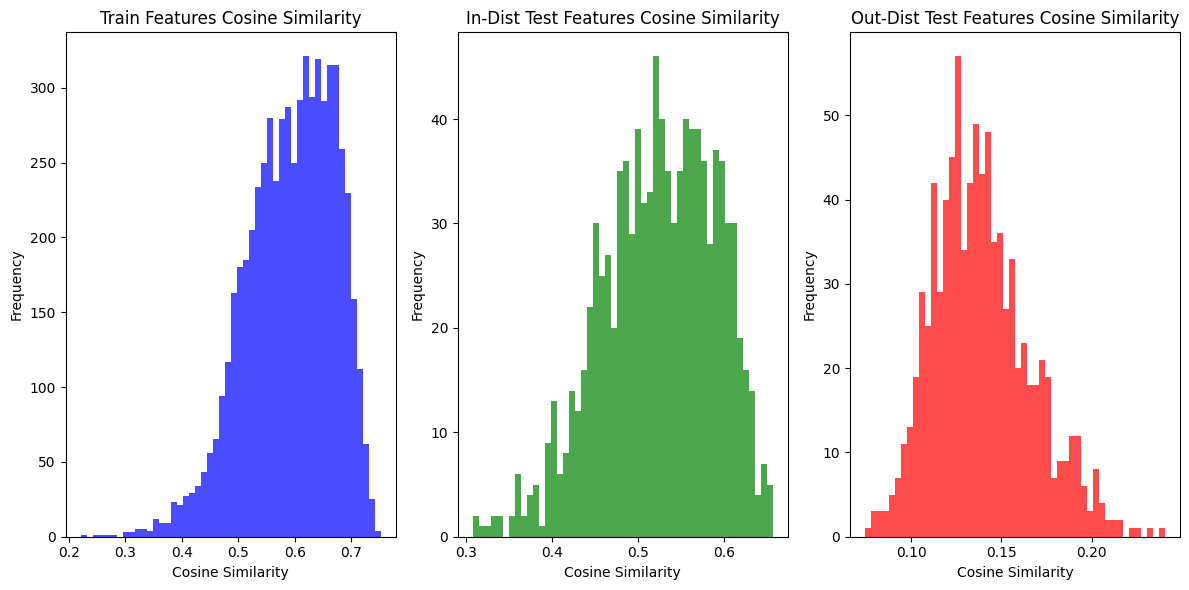

In [ ]:
plt.figure(figsize=(18, 6))

# Training Features Histogram
plt.subplot(1, 3, 1)
plt.hist(cosine_train_similarities['similarities'], bins=50, color='blue', alpha=0.7)
plt.title('Train Features Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

# In-Dist Features Histogram
plt.subplot(1, 3, 2)
plt.hist(cosine_in_dist_similarities['similarities'], bins=50, color='green', alpha=0.7)
plt.title('In-Dist Features Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

# Out-Dist Features Histogram
plt.subplot(1, 3, 3)
plt.hist(cosine_out_dist_similarities['similarities'], bins=50, color='red', alpha=0.7)
plt.title('Out-Dist Features Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()